In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
import math
import numpy as np

from google.colab import drive
drive.mount('/content/drive')


%cd /content/drive/MyDrive/colab/
!unzip -qq "/content/drive/MyDrive/colab/data.zip"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/colab


In [10]:
TRAIN_DATA_DIR = '/content/drive/MyDrive/colab/train'
VALIDATION_DATA_DIR = '/content/drive/MyDrive/colab/validation'
TEST_DATA_DIR = '/content/drive/MyDrive/colab/test'

In [11]:
 
TRAIN_SAMPLES = 7840
VALIDATION_SAMPLES = 3366
NUM_CLASSES = 7
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 100

In [12]:
# 데이터 생성

#ImageDataGenerator를 통한 학습용 이지미 추가 생성 (부적합?및 과적합 방지)
#Validation 이미지는 정규화만 실시 (증강하면 검증의 이유가 사라짐)


train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2)
 
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [13]:




train_generator = train_datagen.flow_from_directory(TRAIN_DATA_DIR,
                                                    target_size=(IMG_WIDTH,
                                                                 IMG_HEIGHT),
                                                    batch_size=BATCH_SIZE,
                                                    shuffle=True,
                                                    seed=12345,
                                                    class_mode='categorical')
 
validation_generator = val_datagen.flow_from_directory(
    VALIDATION_DATA_DIR,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    shuffle=False,
    class_mode='categorical')

Found 7840 images belonging to 7 classes.
Found 3366 images belonging to 7 classes.


In [14]:
def model_maker():
    base_model = VGG16(include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))
    print(len(base_model.layers))
 
    for layer in base_model.layers[:]:
        layer.trainable = False
 
    input = Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3))
    custom_model = base_model(input)
    custom_model = GlobalAveragePooling2D()(custom_model)
    custom_model = Dense(32, activation='relu')(custom_model)
    predictions = Dense(NUM_CLASSES, activation='softmax')(custom_model)
    
    return Model(inputs=input, outputs=predictions)
model_final = model_maker()
model_final.summary()

58900480/58889256 [==============================] - 0s 0us/step
19
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 32)                16416     
                                                                 
 dense_1 (Dense)             (None, 7)                 231       
                                                                 
Total params: 14,731,335
Trainable params: 16,647
Non-train

In [16]:
model_final.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=['acc'])
 
history = model_final.fit(
    train_generator,
    steps_per_epoch=TRAIN_SAMPLES // BATCH_SIZE, # number of updates
    epochs=100,
    validation_data=validation_generator,
    validation_steps=VALIDATION_SAMPLES // BATCH_SIZE)

Epoch 1/100
78/78 [==============================] - 113s 1s/step - loss: 0.7906 - acc: 0.7390 - val_loss: 0.3587 - val_acc: 0.8809
Epoch 2/100
78/78 [==============================] - 110s 1s/step - loss: 0.2849 - acc: 0.9053 - val_loss: 0.2124 - val_acc: 0.9273
Epoch 3/100
78/78 [==============================] - 110s 1s/step - loss: 0.2065 - acc: 0.9319 - val_loss: 0.1701 - val_acc: 0.9424
Epoch 4/100
78/78 [==============================] - 110s 1s/step - loss: 0.1735 - acc: 0.9466 - val_loss: 0.1470 - val_acc: 0.9503
Epoch 5/100
78/78 [==============================] - 110s 1s/step - loss: 0.1514 - acc: 0.9506 - val_loss: 0.1250 - val_acc: 0.9558
Epoch 6/100
78/78 [==============================] - 111s 1s/step - loss: 0.1367 - acc: 0.9563 - val_loss: 0.1217 - val_acc: 0.9588
Epoch 7/100
78/78 [==============================] - 111s 1s/step - loss: 0.1297 - acc: 0.9575 - val_loss: 0.1192 - val_acc: 0.9552
Epoch 8/100
78/78 [==============================] - 112s 1s/step - loss: 0.

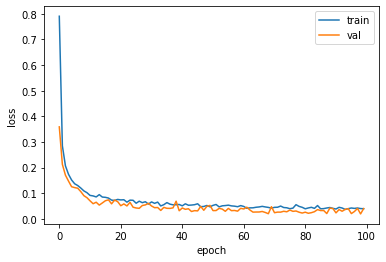

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

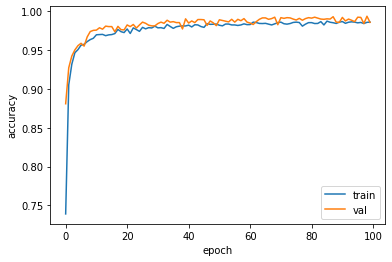

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
 
test_generator = val_datagen.flow_from_directory(
    TEST_DATA_DIR,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    shuffle=False,
    class_mode='categorical')

In [ ]:
model_final.evaluate(test_generator, steps=800 // BATCH_SIZE)

In [ ]:
IMG_HEIGHT = 224
IMG_WIDTH = 224
CHANNELS = 3

In [ ]:
from tensorflow.keras.applications import VGG16   #, Xception

# 사전학습된 모델에서 분류기(classifier를 포함해서 불러올지 결정-> include_top)
# include_top = True (포함)
conv_base = VGG16(weights='imagenet',
                  # 특징 추출기만 가져온다. (classifier제외)
                  include_top=False,
                  input_shape=(IMG_HEIGHT, IMG_WIDTH, CHANNELS))

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
# CNN = Feature Extractor + Classifier
model = models.Sequential()
# Feature Extractor(conv_base) 
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               6422784   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 21,137,729
Trainable params: 21,137,729
Non-trainable params: 0
_________________________________________________________________


In [ ]:
conv_base.trainable = False

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

# # data augmentation은 train 데이터에만 적용해야 한다!!!
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

# # 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        TRAIN_DATA_DIR,
        # 모든 이미지의 크기를 150 × 150로 변경합니다
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=100,
        # binary_crossentropy 손실을 사용하므로 이진 레이블이 필요합니다
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        VALIDATION_DATA_DIR,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=100,
        class_mode='categorical')

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=['acc'])

Found 4480 images belonging to 4 classes.
Found 4480 images belonging to 4 classes.


In [ ]:
# callback함수 추가
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

#'val_loss'가 줄지 않고 3 EPOCH동안 유지되면 학습율(learningRate를 50%로 줄인다.)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.0000001)

#'val_loss'가 5EPOCH동안 올라가지 않으면 학습을 중단한다.
es=EarlyStopping(monitor='val_loss', patience=10)

# 학습중에 'val_acc'가 가장 높을때 'fashionMnistDNN.h5'에 weight값을 저장한다.
mc = ModelCheckpoint('VGG16_1.h5', monitor='val_acc', mode='max', verbose = 1, save_best_only=True)

callback = [rlr,es,mc]

In [ ]:
history = model.fit(
      TRAIN_DATA_DIR,
      #steps_per_epoch=100,
      epochs=30,
      validation_data=VALIDATION_DATA_DIR,
      #validation_steps=50,
      callbacks=callback)

IndexError: ignored

# 하기 코드들은 학습 전에 코드 돌리는거 자체를 실패

In [ ]:
## library  as tf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import os
import re
from PIL import Image
import shutil
import xml.etree.ElementTree as et
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

## library import
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import tensorflow.keras as keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns


import numpy as np
import pandas as pd
import os
import re
from PIL import Image
import shutil
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
tf.__version__

'2.8.2'

In [ ]:
!nvidia-smi

Wed Aug 17 06:47:41 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 특성 추출

특성 추출은 사전에 학습된 네트워크의 표현을 사용해 새로운 샘플에서 흥미로운 특성을 뽑아내는 것입니다. 이런 특성을 사용하여 새로운 분류기를 처음부터 훈련합니다.

앞서 보았듯이 컨브넷은 이미지 분류를 위해 두 부분으로 구성됩니다. 먼저 연속된 합성곱과 풀링 층으로 시작해서 완전 연결 분류기로 끝납니다. 첫 번째 부분을 모델의 합성곱 기반층(convolutional base)이라고 부르겠습니다. 컨브넷의 경우 특성 추출은 사전에 훈련된 네트워크의 합성곱 기반층을 선택해 새로운 데이터를 통과시키고 그 출력으로 새로운 분류기를 훈련합니다.

![swapping FC classifiers](https://s3.amazonaws.com/book.keras.io/img/ch5/swapping_fc_classifier.png)

왜 합성곱 층만 재사용할까요? 완전 연결 분류기도 재사용할 수 있을까요? 일반적으로 권장하지 않습니다. 합성곱 층에 의해 학습된 표현이 더 일반적이어서 재사용 가능하기 때문입니다. 컨브넷의 특성 맵은 사진에 대한 일반적인 컨셉의 존재 여부를 기록한 맵입니다. 그래서 주어진 컴퓨터 비전 문제에 상관없이 유용하게 사용할 수 있습니다. 하지만 분류기에서 학습한 표현은 모델이 훈련된 클래스 집합에 특화되어 있습니다. 분류기는 전체 사진에 어떤 클래스가 존재할 확률에 관한 정보만을 담고 있습니다. 더군다나 완전 연결 층에서 찾은 표현은 더 이상 입력 이미지에 있는 객체의 위치 정보를 가지고 있지 않습니다. 완전 연결 층들은 공간 개념을 제거하지만 합성곱의 특성 맵은 객체의 위치를 고려합니다. 객체의 위치가 중요한 문제라면 완전 연결 층에서 만든 특성은 크게 쓸모가 없습니다.

특정 합성곱 층에서 추출한 표현의 일반성(그리고 재사용성)의 수준은 모델에 있는 층의 깊이에 달려 있습니다. 모델의 하위 층은 (에지, 색깔, 질감 등과 같이) 지역적이고 매우 일반적인 특성 맵을 추출합니다. 반면 상위 층은 ('강아지 눈'이나 '고양이 귀'와 같이) 좀 더 추상적인 개념을 추출합니다. 만약 새로운 데이터셋이 원본 모델이 훈련한 데이터셋과 많이 다르다면 전체 합성곱 기반층을 사용하는 것보다는 모델의 하위 층 몇 개만 특성 추출에 사용하는 것이 좋습니다.

ImageNet의 클래스 집합에는 여러 종류의 강아지와 고양이를 포함하고 있습니다. 이런 경우 원본 모델의 완전 연결 층에 있는 정보를 재사용하는 것이 도움이 될 것 같습니다. 하지만 새로운 문제의 클래스가 원본 모델의 클래스 집합과 겹치지 않는 좀 더 일반적인 경우를 다루기 위해서 여기서는 완전 연결 층을 사용하지 않겠습니다.

ImageNet 데이터셋에 훈련된 VGG16 네트워크의 합성곱 기반층을 사용하여 강아지와 고양이 이미지에서 유용한 특성을 추출해 보겠습니다. 그런 다음 이 특성으로 강아지 vs. 고양이 분류기를 훈련합니다.

VGG16 모델은 케라스에 패키지로 포함되어 있습니다. `keras.applications` 모듈에서 임포트할 수 있습니다. `keras.applications` 모듈에서 사용 가능한 이미지 분류 모델은 다음과 같습니다(모두 ImageNet 데이터셋에서 훈련되었습니다):

* Xception
* InceptionV3
* ResNet50
* VGG16
* VGG19
* MobileNet

VGG16 모델을 만들어 보죠:

In [ ]:
IMG_HEIGHT = 224
IMG_WIDTH = 224
CHANNELS = 3

In [ ]:
from tensorflow.keras.applications import VGG16   #, Xception

# 사전학습된 모델에서 분류기(classifier를 포함해서 불러올지 결정-> include_top)
# include_top = True (포함)
conv_base = VGG16(weights='imagenet',
                  # 특징 추출기만 가져온다. (classifier제외)
                  include_top=False,
                  input_shape=(IMG_HEIGHT, IMG_WIDTH, CHANNELS))
                

VGG16 함수에 세 개의 매개변수를 전달합니다:

* `weights`는 모델을 초기화할 가중치 체크포인트를 지정합니다.
* `include_top`은 네트워크의 최상위 완전 연결 분류기를 포함할지 안할지를 지정합니다. 기본값은 ImageNet의 1,000개의 클래스에 대응되는 완전 연결 분류기를 포함합니다. 별도의 (강아지와 고양이 두 개의 클래스를 구분하는) 완전 연결 층을 추가하려고 하므로 이를 포함시키지 않습니다.
* `input_shape`은 네트워크에 주입할 이미지 텐서의 크기입니다. 이 매개변수는 선택사항입니다. 이 값을 지정하지 않으면 네트워크가 어떤 크기의 입력도 처리할 수 있습니다.

다음은 VGG16 합성곱 기반층의 자세한 구조입니다. 이 구조는 앞에서 보았던 간단한 컨브넷과 비슷합니다.

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

최종 특성 맵의 크기는 `(4, 4, 512)`입니다. 이 특성 위에 완전 연결 층을 놓을 것입니다.
이 지점에서 두 가지 방식이 가능합니다.

* 새로운 데이터셋에서 합성곱 기반층을 실행하고 출력을 넘파이 배열로 디스크에 저장합니다. 그다음 이 데이터를 이 책의 1부에서 보았던 것과 비슷한 독립된 완전 연결 분류기에 입력으로 사용합니다. 합성곱 연산은 전체 과정 중에서 가장 비싼 부분입니다. 이 방식은 모든 입력 이미지에 대해 합성곱 기반층을 한 번만 실행하면 되기 때문에 빠르고 비용이 적게 듭니다. 하지만 이런 이유 때문에 이 기법에는 데이터 증식을 사용할 수 없습니다.
* 준비한 모델(`conv_base`) 위에 `Dense` 층을 쌓아 확장합니다. 그다음 입력 데이터에서 엔드 투 엔드로 전체 모델을 실행합니다. 모델에 노출된 모든 입력 이미지가 매번 합성곱 기반층을 통과하기 때문에 데이터 증식을 사용할 수 있습니다. 하지만 이런 이유로 이 방식은 첫 번째 방식보다 훨씬 비용이 많이 듭니다.

두 가지 방식을 모두 다루어 보겠습니다. 첫 번째 방식을 구현하는 코드를 살펴봅니다. `conv_base`에 데이터를 주입하고 출력을 기록합니다. 이 출력을 새로운 모델의 입력으로 사용하겠습니다.

먼저 앞서 소개한 `ImageDataGenerator`를 사용해 이미지와 레이블을 넘파이 배열로 추출하겠습니다. `conv_base` 모델의 `predict` 메서드를 호출하여 이 이미지에서 특성을 추출합니다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# github에서 데이터셋을 다운로드 받기 위해
##!git clone https://github.com/gilbutITbook/006975.git

# import os, shutil

# # # 원본 데이터셋을 압축 해제한 디렉터리 경로
# # original_dataset_dir = '/content/drive/MyDrive/colab/train'

# # # 소규모 데이터셋을 저장할 디렉터리
# # base_dir = '/content/drive/MyDrive/colab/validation'


# train_dir = '/conten/drive/MyDrive/colab/train'
# val_dir = '/conten/drive/MyDrive/colab/validation'
# val_dir = '/conten/drive/MyDrive/colab/test'


# if os.path.exists(base_dir):  # 반복적인 실행을 위해 디렉토리를 삭제합니다.
#     shutil.rmtree(base_dir)   # 이 코드는 책에 포함되어 있지 않습니다.
# os.mkdir(base_dir)

# # 훈련, 검증, 테스트 분할을 위한 디렉터리
# train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)

# validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)
# test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

# # 훈련용 고양이 사진 디렉터리
# train_cats_dir = os.path.join(train_dir, 'cats')
# os.mkdir(train_cats_dir)

# # 훈련용 강아지 사진 디렉터리
# train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_dogs_dir)

# # 검증용 고양이 사진 디렉터리
# validation_cats_dir = os.path.join(validation_dir, 'cats')
# os.mkdir(validation_cats_dir)

# # 검증용 강아지 사진 디렉터리
# validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# os.mkdir(validation_dogs_dir)

# # 테스트용 고양이 사진 디렉터리
# test_cats_dir = os.path.join(test_dir, 'cats')
# os.mkdir(test_cats_dir)

# # 테스트용 강아지 사진 디렉터리
# test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(test_dogs_dir)

# # 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_cats_dir, fname)
#     shutil.copyfile(src, dst)

#     # 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(validation_cats_dir, fname)
#     shutil.copyfile(src, dst)
    
# # 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
# fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(test_cats_dir, fname)
#     shutil.copyfile(src, dst)
    
# # 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_dogs_dir, fname)
#     shutil.copyfile(src, dst)
    
# # 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(validation_dogs_dir, fname)
#     shutil.copyfile(src, dst)
    
# # 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
# fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(test_dogs_dir, fname)
#     shutil.copyfile(src, dst)

Cloning into '006975'...
remote: Enumerating objects: 102534, done.
remote: Total 102534 (delta 0), reused 0 (delta 0), pack-reused 102534
Receiving objects: 100% (102534/102534), 202.75 MiB | 28.18 MiB/s, done.
Resolving deltas: 100% (11/11), done.
Checking out files: 100% (104042/104042), done.


In [ ]:
%cd /content/drive/MyDrive/colab/
!unzip -qq "/content/drive/MyDrive/colab/img_crop_black"

/content/drive/MyDrive/colab
replace img/12063.한미오메가연질캡슐1000밀리그램_black_001.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace img/12063.한미오메가연질캡슐1000밀리그램_black_001.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
%cd /content/drive/MyDrive/colab/
!unzip -qq "/content/drive/MyDrive/colab/val.zip"

/content/drive/MyDrive/colab
replace val/12063.한미오메가연질캡슐1000밀리그램_black_001.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import os, shutil

data_dir = '/content/drive/MyDrive/colab/'
#val_dir = '/content/drive/MyDrive/colab/val'

train_dir = os.path.join(data_dir, 'img')
val_dir = os.path.join(data_dir, 'val')

In [ ]:
print('훈련용 이미지 :', len(os.listdir(train_dir)))
print('검증용 이미지 :', len(os.listdir(val_dir)))
#print('검증용 이미지 :', len(os.listdir(test_dir)))

훈련용 이미지 : 15257
검증용 이미지 : 1398


In [ ]:
## image file 수 확인
image_files = [fname for fname in os.listdir(train_dir) if os.path.splitext(fname)[-1] == '.jpg' or os.path.splitext(fname)[-1] == '.png']
print(len(image_files))
image_files[:5]

7611


['12063.한미오메가연질캡슐1000밀리그램_black_001.png',
 '12063.한미오메가연질캡슐1000밀리그램_black_002.png',
 '12063.한미오메가연질캡슐1000밀리그램_black_003.png',
 '12063.한미오메가연질캡슐1000밀리그램_black_004.png',
 '12063.한미오메가연질캡슐1000밀리그램_black_005.png']

In [ ]:
import re

class_list = set()
for image_file in image_files:
    file_name = os.path.splitext(image_file)[0]
    class_name = re.split('[/,. :, _]',file_name)[-3]
    class_list.add(class_name)
class_list = list(class_list)
print(len(class_list))

7


In [ ]:
class_list.sort()
class_list

['로프민캡슐',
 '모드콜에스연질캡슐',
 '이소티논연질캡슐10밀리그램',
 '이지엔6프로연질캡슐',
 '캐롤비콜드연질캡슐',
 '탁센연질캡슐(나프록센)',
 '한미오메가연질캡슐1000밀리그램']

In [ ]:
class2idx = {cls:idx for idx, cls in enumerate(class_list)}
class2idx

{'로프민캡슐': 0,
 '모드콜에스연질캡슐': 1,
 '이소티논연질캡슐10밀리그램': 2,
 '이지엔6프로연질캡슐': 3,
 '캐롤비콜드연질캡슐': 4,
 '탁센연질캡슐(나프록센)': 5,
 '한미오메가연질캡슐1000밀리그램': 6}

이 모델의 구조는 다음과 같습니다:

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
# CNN = Feature Extractor + Classifier
model = models.Sequential()
# Feature Extractor(conv_base) 
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 21,137,729
Trainable params: 21,137,729
Non-trainable params: 0
_________________________________________________________________


여기서 볼 수 있듯이 VGG16의 합성곱 기반층은 14,714,688개의 매우 많은 파라미터를 가지고 있습니다. 합성곱 기반층 위에 추가한 분류기는 2백만 개의 파라미터를 가집니다.

모델을 컴파일하고 훈련하기 전에 합성곱 기반층을 동결하는 것이 아주 중요합니다. 하나 이상의 층을 동결한다는 것은 훈련하는 동안 가중치가 업데이트되지 않도록 막는다는 뜻입니다. 이렇게 하지 않으면 합성곱 기반층에 의해 사전에 학습된 표현이 훈련하는 동안 수정될 것입니다. 맨 위의 `Dense` 층은 랜덤하게 초기화되었기 때문에 매우 큰 가중치 업데이트 값이 네트워크에 전파될 것입니다. 이는 사전에 학습된 표현을 크게 훼손하게 됩니다.

케라스에서는 `trainable` 속성을 `False`로 설정하여 네트워크를 동결할 수 있습니다:

In [ ]:
model.trainable_weights

[<tf.Variable 'block1_conv1/kernel:0' shape=(3, 3, 3, 64) dtype=float32, numpy=
 array([[[[ 4.29470569e-01,  1.17273867e-01,  3.40129584e-02, ...,
           -1.32241577e-01, -5.33475243e-02,  7.57738389e-03],
          [ 5.50379455e-01,  2.08774377e-02,  9.88311544e-02, ...,
           -8.48205537e-02, -5.11389151e-02,  3.74943428e-02],
          [ 4.80015397e-01, -1.72696680e-01,  3.75577137e-02, ...,
           -1.27135560e-01, -5.02991639e-02,  3.48965675e-02]],
 
         [[ 3.73466998e-01,  1.62062630e-01,  1.70863140e-03, ...,
           -1.48207128e-01, -2.35300660e-01, -6.30356818e-02],
          [ 4.40074533e-01,  4.73412387e-02,  5.13819456e-02, ...,
           -9.88498852e-02, -2.96195745e-01, -7.04357103e-02],
          [ 4.08547401e-01, -1.70375049e-01, -4.96297423e-03, ...,
           -1.22360572e-01, -2.76450396e-01, -3.90796512e-02]],
 
         [[-6.13601133e-02,  1.35693997e-01, -1.15694344e-01, ...,
           -1.40158370e-01, -3.77666801e-01, -3.00509870e-01],
    

In [ ]:
print('conv_base를 동결하기 전 훈련되는 가중치의 종류 수(레이어별 W,b의 종류):', 
      len(model.trainable_weights))

conv_base를 동결하기 전 훈련되는 가중치의 종류 수(레이어별 W,b의 종류): 30


In [ ]:
# 특징 추출기의 파라메터는 학습하지 않는다.
conv_base.trainable = False

In [ ]:
print('conv_base를 동결한 후 훈련되는 가중치의 수:', 
      len(model.trainable_weights))

conv_base를 동결한 후 훈련되는 가중치의 수: 4


이렇게 설정하면 추가한 두 개의 `Dense` 층의 가중치만 훈련될 것입니다. 층마다 두 개씩(가중치 행렬과 편향 벡터) 총 네 개의 텐서가 훈련됩니다. 변경 사항을 적용하려면 먼저 모델을 컴파일해야 합니다. 컴파일 단계 후에 `trainable` 속성을 변경하면 반드시 모델을 다시 컴파일해야 합니다. 그렇지 않으면 변경 사항이 적용되지 않습니다.

이제 앞의 예제에서 사용했던 데이터 증식을 사용하여 모델 훈련을 시작할 수 있습니다:

In [ ]:
conv_base.trainable = False

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

# # data augmentation은 train 데이터에만 적용해야 한다!!!
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

# # 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지의 크기를 150 × 150로 변경합니다
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=20,
        # binary_crossentropy 손실을 사용하므로 이진 레이블이 필요합니다
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=20,
        class_mode='categorical')

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
              optimizer=RMSprop(learning_rate=2e-5),
              metrics=['acc'])

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [ ]:
# callback함수 추가
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

#'val_loss'가 줄지 않고 3 EPOCH동안 유지되면 학습율(learningRate를 50%로 줄인다.)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.0000001)

#'val_loss'가 5EPOCH동안 올라가지 않으면 학습을 중단한다.
es=EarlyStopping(monitor='val_loss', patience=10)

# 학습중에 'val_acc'가 가장 높을때 'fashionMnistDNN.h5'에 weight값을 저장한다.
mc = ModelCheckpoint('VGG16_1.h5', monitor='val_acc', mode='max', verbose = 1, save_best_only=True)

callback = [rlr,es,mc]

In [ ]:
history = model.fit(
      train_dir,
      #steps_per_epoch=100,
      epochs=30,
      validation_data=val_dir,
      #validation_steps=50,
      callbacks=callback)

IndexError: ignored

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save('/content/drive/MyDrive/006975/cats_and_dogs_small_3.h5')

결과 그래프를 다시 그려 봅시다:

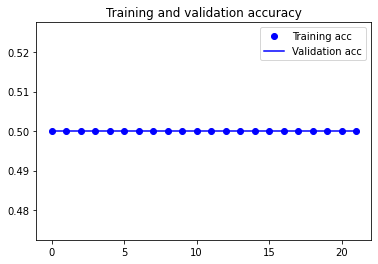

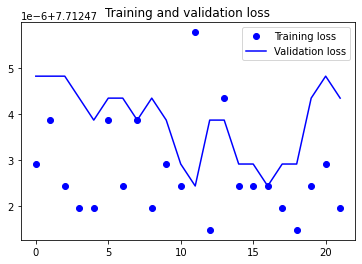

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#val_loss=>0.2311 30epoch -> acc : 0.9010
test_loss, test_acc = model.evaluate(test_generator)

50/50 [==============================] - 4s 71ms/step - loss: 0.2407 - acc: 0.9010


여기서 볼 수 있듯이 검증 정확도가 이전과 비슷하지만 처음부터 훈련시킨 소규모 컨브넷보다 과대적합이 줄었습니다.

## 미세 조정(Fine Tunning)

모델을 재사용하는 데 널리 사용되는 또 하나의 기법은 특성 추출을 보완하는 미세 조정입니다. 미세 조정은 특성 추출에 사용했던 동결 모델의 상위 층 몇 개를 동결에서 해제하고 모델에 새로 추가한 층(여기서는 완전 연결 분류기)과 함께 훈련하는 것입니다. 주어진 문제에 조금 더 밀접하게 재사용 모델의 표현을 일부 조정하기 때문에 미세 조정이라고 부릅니다.

![fine-tuning VGG16](https://s3.amazonaws.com/book.keras.io/img/ch5/vgg16_fine_tuning.png)

앞서 랜덤하게 초기화된 상단 분류기를 훈련하기 위해 VGG16의 합성곱 기반층을 동결해야 한다고 말했습니다. 같은 이유로 맨 위에 있는 분류기가 훈련된 후에 합성곱 기반의 상위 층을 미세 조정할 수 있습니다. 분류기가 미리 훈련되지 않으면 훈련되는 동안 너무 큰 오차 신호가 네트워크에 전파됩니다. 이는 미세 조정될 층들이 사전에 학습한 표현들을 망가뜨리게 될 것입니다. 네트워크를 미세 조정하는 단계는 다음과 같습니다:

1. 사전에 훈련된 기반 네트워크 위에 새로운 네트워크를 추가합니다.
2. 기반 네트워크를 동결합니다.
3. 새로 추가한 네트워크를 훈련합니다.
4. 기반 네트워크에서 일부 층의 동결을 해제합니다.
5. 동결을 해제한 층과 새로 추가한 층을 함께 훈련합니다.

처음 세 단계는 특성 추출을 할 때 이미 완료했습니다. 네 번째 단계를 진행해 보죠. `conv_base`의 동결을 해제하고 개별 층을 동결하겠습니다.

기억을 되살리기 위해 합성곱 기반층의 구조를 다시 확인해 보겠습니다:

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

마지막 세 개의 합성곱 층을 미세 조정하겠습니다. 즉, `block4_pool`까지 모든 층은 동결되고 `block5_conv1`, `block5_conv2`, `block5_conv3` 층은 학습 대상이 됩니다.

왜 더 많은 층을 미세 조정하지 않을까요? 왜 전체 합성곱 기반층을 미세 조정하지 않을까요? 그렇게 할 수도 있지만 다음 사항을 고려해야 합니다:

* 합성곱 기반층에 있는 하위 층들은 좀 더 일반적이고 재사용 가능한 특성들을 인코딩합니다. 반면 상위 층은 좀 더 특화된 특성을 인코딩합니다. 새로운 문제에 재활용하도록 수정이 필요한 것은 구체적인 특성이므로 이들을 미세 조정하는 것이 유리합니다. 하위 층으로 갈수록 미세 조정에 대한 효과가 감소합니다.
* 훈련해야 할 파라미터가 많을수록 과대적합의 위험이 커집니다. 합성곱 기반층은 1천 5백만 개의 파라미터를 가지고 있습니다. 작은 데이터셋으로 전부 훈련하려고 하면 매우 위험합니다.

그러므로 이런 상황에서는 합성곱 기반층에서 최상위 두 세개의 층만 미세 조정하는 것이 좋습니다.

앞선 예제 코드에 이어서 미세 조정을 설정해보죠:

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
print('conv_base를 동결한 후 훈련되는 가중치의 수:', 
      len(model.trainable_weights))

conv_base를 동결한 후 훈련되는 가중치의 수: 10


이제 네트워크의 미세 조정을 시작하겠습니다. 학습률을 낮춘 RMSProp 옵티마이저를 사용합니다. 학습률을 낮추는 이유는 미세 조정하는 세 개의 층에서 학습된 표현을 조금씩 수정하기 위해서입니다. 변경량이 너무 크면 학습된 표현에 나쁜 영향을 끼칠 수 있습니다.

미세 조정을 진행해 보죠:

In [ ]:
# callback함수 추가
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

#'val_loss'가 줄지 않고 3 EPOCH동안 유지되면 학습율(learningRate를 50%로 줄인다.)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0000001)

#'val_loss'가 5EPOCH동안 올라가지 않으면 학습을 중단한다.
es=EarlyStopping(monitor='val_acc', patience=10)

# 학습중에 'val_acc'가 가장 높을때 'fashionMnistDNN.h5'에 weight값을 저장한다.
mc = ModelCheckpoint('VGG16_fineTunning.h5', monitor='val_acc', mode='max', verbose = 1, save_best_only=True)

callback = [rlr,es,mc]

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(learning_rate=1e-5),
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=50,
      validation_data=validation_generator,
      callbacks=callback,
      validation_steps=50)

Epoch 1/50
100/100 [==============================] - ETA: 0s - loss: 0.0441 - acc: 0.9845
Epoch 1: val_acc improved from -inf to 0.93000, saving model to VGG16_fineTunning.h5
100/100 [==============================] - 21s 201ms/step - loss: 0.0441 - acc: 0.9845 - val_loss: 0.2160 - val_acc: 0.9300 - lr: 1.0000e-05
Epoch 2/50
100/100 [==============================] - ETA: 0s - loss: 0.0390 - acc: 0.9870
Epoch 2: val_acc did not improve from 0.93000
100/100 [==============================] - 20s 195ms/step - loss: 0.0390 - acc: 0.9870 - val_loss: 0.2373 - val_acc: 0.9250 - lr: 1.0000e-05
Epoch 3/50
100/100 [==============================] - ETA: 0s - loss: 0.0414 - acc: 0.9840
Epoch 3: val_acc did not improve from 0.93000
100/100 [==============================] - 20s 195ms/step - loss: 0.0414 - acc: 0.9840 - val_loss: 0.4213 - val_acc: 0.8880 - lr: 1.0000e-05
Epoch 4/50
100/100 [==============================] - ETA: 0s - loss: 0.0387 - acc: 0.9885
Epoch 4: val_acc did not improve fro

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)

50/50 [==============================] - 4s 72ms/step - loss: 0.2542 - acc: 0.9320


In [ ]:
model.save('/content/drive/MyDrive/006975/cats_and_dogs_small_4.h5')

이전과 동일한 코드로 결과 그래프를 그려 보겠습니다:

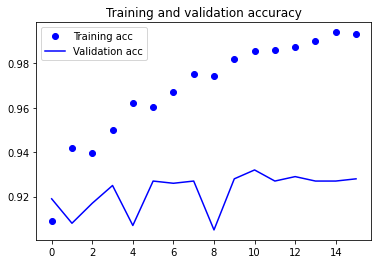

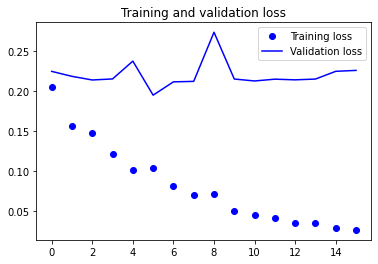

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

그래프가 불규칙하게 보입니다. 그래프를 보기 쉽게하기 위해 지수 이동 평균으로 정확도와 손실 값을 부드럽게 표현할 수 있습니다. 다음은 지수 이동 평균을 구하기 위한 간단한 함수입니다:

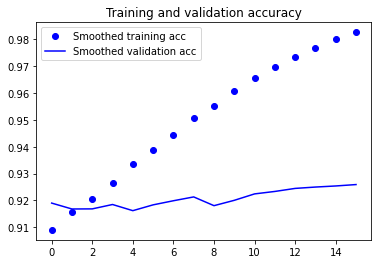

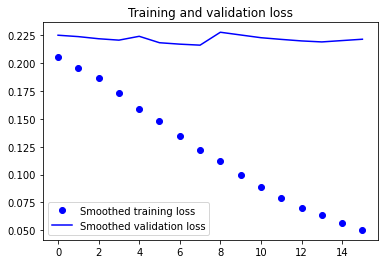

In [ ]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

검증 정확도 곡선이 훨씬 깨끗하게 보입니다. 정확도가 확실히 1% 이상 향상되었습니다.

손실 곡선은 실제 어떤 향상을 얻지 못했습니다(사실 악화되었습니다). 손실히 감소되지 않았는데 어떻게 정확도가 안정되거나 향상될 수 있을까요? 답은 간단합니다. 그래프는 개별적인 손실 값의 평균을 그린 것입니다. 하지만 정확도에 영향을 미치는 것은 손실 값의 분포이지 평균이 아닙니다. 정확도는 모델이 예측한 클래스 확률이 어떤 임계값을 넘었는지에 대한 결과이기 때문입니다. 모델이 더 향상더라도 평균 손실에 반영되지 않을 수 있습니다.

이제 마지막으로 테스트 데이터에서 이 모델을 평가하겠습니다:

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  import sys


test acc: 0.9300000071525574


92%의 테스트 정확도를 얻을 것입니다. 이 데이터셋을 사용한 원래 캐글 경연 대회에서 꽤 높은 순위입니다. 하지만 최신 딥러닝 기법으로 훈련 데이터의 일부분(약 10%)만을 사용해서 이런 결과를 달성했습니다. 20,000개의 샘플에서 훈련하는 것과 2,000개의 샘플에서 훈련하는 것 사이에는 아주 큰 차이점이 있습니다!

## 정리

다음은 앞의 두 절에 있는 예제로부터 배운 것들입니다.

* 컨브넷은 컴퓨터 비전 작업에 가장 뛰어난 머신 러닝 모델입니다. 아주 작은 데이터셋에서도 처음부터 훈련해서 괜찮은 성능을 낼 수 있습니다.
* 작은 데이터셋에서는 과대적합이 큰 문제입니다. 데이터 증식은 이미지 데이터를 다룰 때 과대적합을 막을 수 있는 강력한 방법입니다.
* 특성 추출 방식으로 새로운 데이터셋에 기존의 컨브넷을 쉽게 재사용할 수 있습니다. 작은 이미지 데이터셋으로 작업할 때 효과적인 기법입니다.
* 특성 추출을 보완하기 위해 미세 조정을 사용할 수 있습니다. 미세 조정은 기존 모델에서 사전에 학습한 표현의 일부를 새로운 문제에 적응시킵니다. 이 기법은 조금 더 성능을 끌어올립니다.

지금까지 이미지 분류 문제에서 특히 작은 데이터셋을 다루기 위한 좋은 도구들을 배웠습니다.